## Simple Linear Regression

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import data

In [3]:
df = pd.read_csv('height-weight (1).csv')

In [4]:
df.head(5)

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


#### For simple linear regression always check relationship between dependent and independent variable

Text(0.5, 1.0, 'Relationship between Weight and Height')

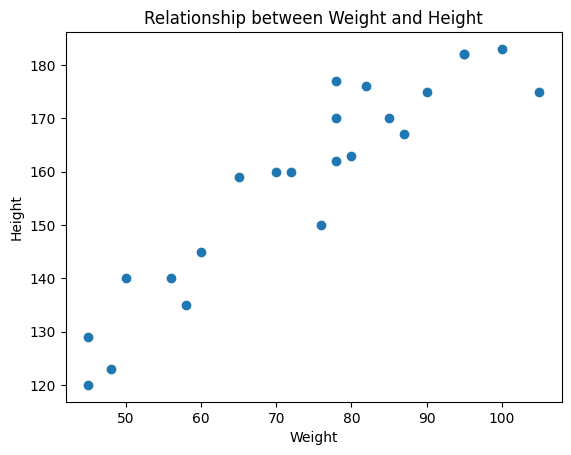

In [5]:
#Using scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Relationship between Weight and Height")

### To find if this relationship is positive or negative you can use correlation

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


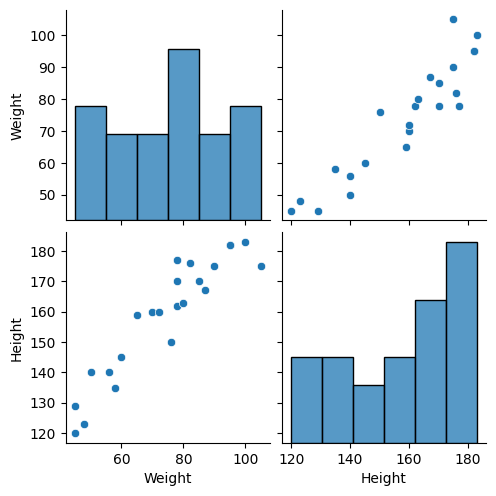

In [7]:
#another way to do the same is pairplot from seaborn
sns.pairplot(df)

### Divide features to dependent and independed

In [8]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [9]:
#Independent feature should be in dataframe X = df[['Weight']] is a dataframe X = df['Weight'] is a series or 2 dimentional array - np.array(X)

X = df[['Weight']]
#dependent features should be in series or 1d array
y = df['Height']
# type(X)


np.array(X).shape
np.array(y).shape

(23,)

## Train test split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [12]:
X_train.shape

(17, 1)

In [13]:
y_train.shape

(17,)

In [14]:
X_test.shape

(6, 1)

In [15]:
y_test.shape

(6,)

## Standardization

In [16]:
## will be applied to all independent features using z score by converting mean = 0 sd= 1 eg: kg, cm Z = xi - mu/ sd
from sklearn.preprocessing import StandardScaler
#initialise
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#fit transform(train data) vs transform (test)  -  will use training data mean & sd in test data as well.
#why we do this? data leakeage. 

## Apply Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

#initialise the object
regression = LinearRegression(n_jobs=-1)
#always 2d array in fit(2d array, any)
regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

In [18]:
regression

LinearRegression(n_jobs=-1)

In [19]:
print("coefficient or slope: ",regression.coef_)
#this is the slope B(beta)1

coefficient or slope:  [17.2982057]


In [20]:
print("intercept: ",regression.intercept_)

intercept:  156.47058823529412


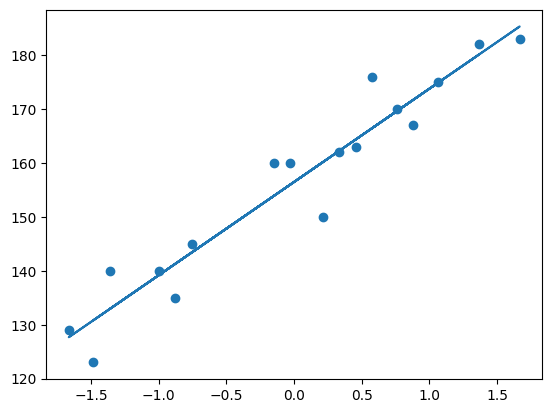

In [21]:
# plot trainign best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train))

In [22]:
#Prediction for the test data
y_pred = regression.predict(X_test)

## Performance metrics

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(10.716374991212605)

In [25]:
mse

np.float64(114.84069295228699)

In [26]:
mae

np.float64(9.665125886795005)

In [27]:
## Rsqure = 1 -SSres/ SStotal


In [28]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [29]:
# adjusted r2

1 - (1-score)*(len(y_test)-1) / (len(y_test) - (X_test.shape[1]-1))

0.7800688931651063

### OLS Linear Regression

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train, X_train).fit()

In [32]:
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                       0.664
Time:                        13:13:30   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/arunekambaram/code/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [34]:
## Prediction for new data

# you should standardise before predicition

regression.predict(scaler.transform([[72]]))

/Users/arunekambaram/code/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])